In [1]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


from scipy.stats import randint
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
data = california_housing.frame
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Проверка на дубликаты

In [3]:
data[data.duplicated()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


Количество отсутствующих данных

In [4]:
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [5]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population", "MedHouseVal"]
# california_housing.frame[features_of_interest]
data.drop(columns=["Latitude", "Longitude"]).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

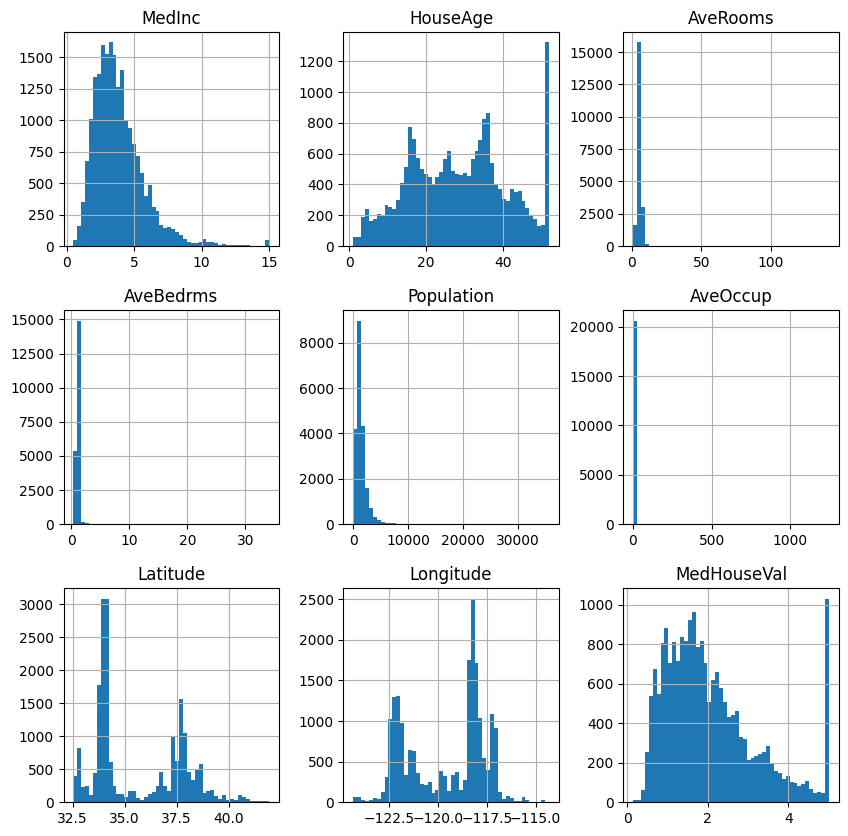

In [6]:
data.hist(bins=50, figsize=(10, 10))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


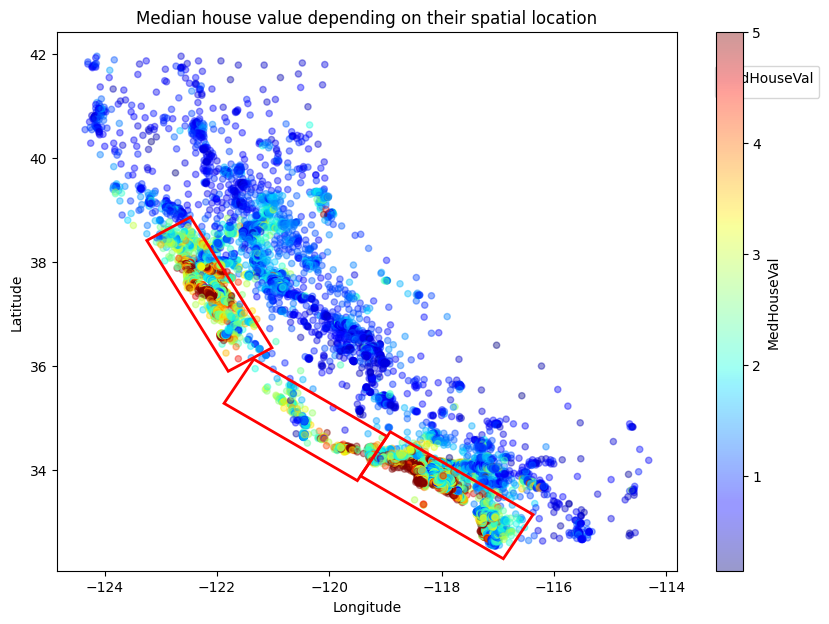

In [7]:
data.plot(kind='scatter', x="Longitude", y="Latitude", alpha=0.4,
             figsize=(10,7),
             c="MedHouseVal", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

x1 = -121.8
y1 = 35.9
width1 = 0.9
height1 = 2.9
angle1 = 30

# Создаем и добавляем квадрат на график
rectangle = plt.Rectangle((x1, y1), width1, height1, fill=None, edgecolor='red', linewidth=2, angle=angle1)
plt.gca().add_patch(rectangle)

x2 = -119.5
y2 = 33.8
width2 = 1
height2 = 2.8
angle2 = 58

rectangle = plt.Rectangle((x2, y2), width2, height2, fill=None, edgecolor='red', linewidth=2, angle=angle2)
plt.gca().add_patch(rectangle)

x3 = -116.9
y3 = 32.3
width3 = 1
height3 = 3
angle3 = 58

rectangle = plt.Rectangle((x3, y3), width3, height3, fill=None, edgecolor='red', linewidth=2, angle=angle3)
plt.gca().add_patch(rectangle)

# Добавляем легенду и заголовок
plt.legend(title='MedHouseVal', bbox_to_anchor=(1.05, 0.95), loc='upper left')
plt.title('Median house value depending on their spatial location')
plt.show()



In [8]:
def point_inside_rotated_rectangle(x, y, x_rect, y_rect, width, height, angle):
    x_diff = x - x_rect
    y_diff = y - y_rect
    rotated_x = x_diff * np.cos(np.radians(angle)) + y_diff * np.sin(np.radians(angle))
    rotated_y = -x_diff * np.sin(np.radians(angle)) + y_diff * np.cos(np.radians(angle))

    
    if 0 <= rotated_x <= width and 0 <= rotated_y <= height:
        return True
    else:
        return False


point_to_check_x = -121.09
point_to_check_y = 39.48


result1 = point_inside_rotated_rectangle(point_to_check_x, point_to_check_y, x1, y1, width1, height1, angle1)
print(f"Точка внутри прямоугольника 1: {result1}")


result2 = point_inside_rotated_rectangle(point_to_check_x, point_to_check_y, x2, y2, width2, height2, angle2)
print(f"Точка внутри прямоугольника 2: {result2}")


result3 = point_inside_rotated_rectangle(point_to_check_x, point_to_check_y, x3, y3, width3, height3, angle3)
print(f"Точка внутри прямоугольника 3: {result3}")

Точка внутри прямоугольника 1: False
Точка внутри прямоугольника 2: False
Точка внутри прямоугольника 3: False


In [9]:
data[['Longitude', 'Latitude']]

,Longitude,Latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85
...,...,...
20635,-121.09,39.48
20636,-121.21,39.49
20637,-121.22,39.43
20638,-121.32,39.43


In [10]:
def check(x, y):
    result1 = point_inside_rotated_rectangle(x, y, x1, y1, width1, height1, angle1)
    result2 = point_inside_rotated_rectangle(x, y, x2, y2, width2, height2, angle2)
    result3 = point_inside_rotated_rectangle(x, y, x3, y3, width3, height3, angle3)
    if  result1 or result2 or result3:
        return 1
    else:
        return 0

data["rich_area"] = [check(x, y) for x, y in data[['Longitude', 'Latitude']].values]
data.rich_area.unique()

array([1, 0], dtype=int64)

In [11]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,rich_area
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0


In [12]:
matrix = data.corr()
matrix['MedHouseVal'].sort_values(ascending=False)


MedHouseVal    1.000000
MedInc         0.688075
rich_area      0.527709
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

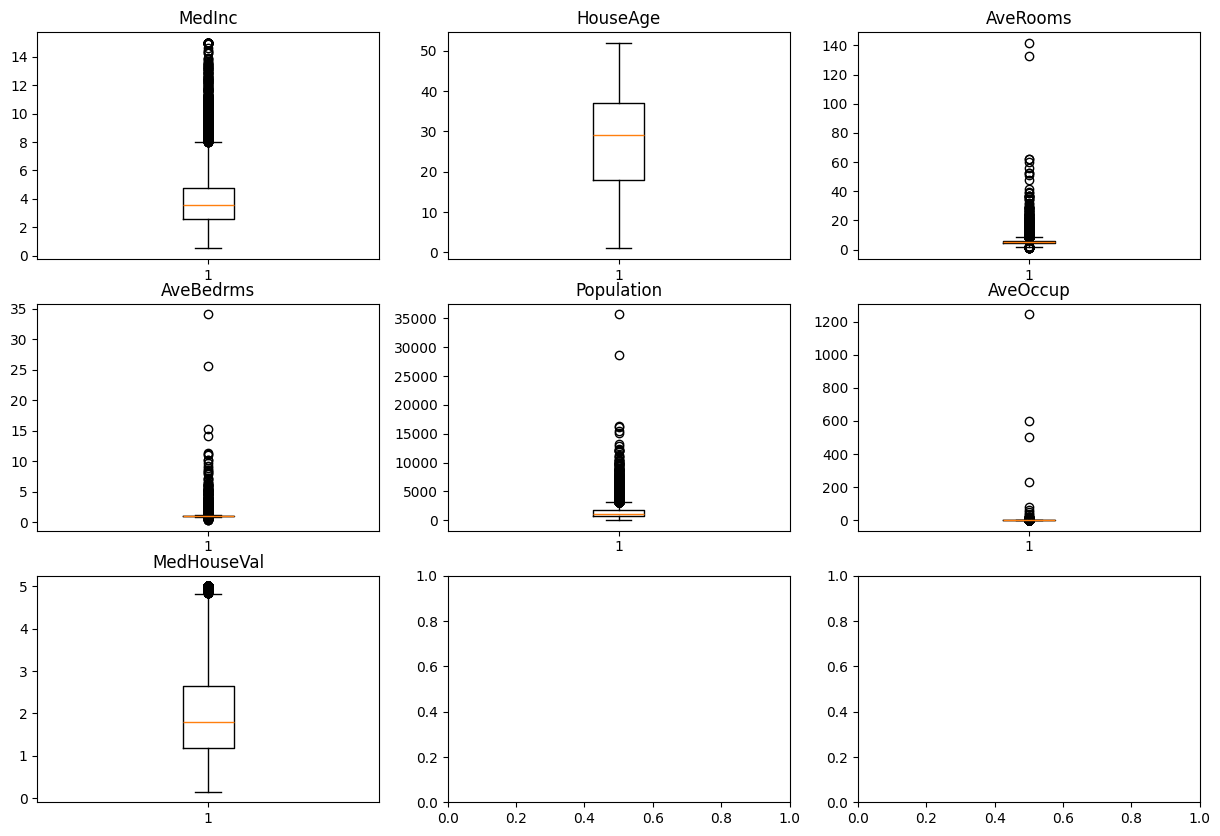

In [13]:
import matplotlib.pyplot as plt


y = data

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10))


ax[0,0].boxplot(y.iloc[:, 0])
ax[0,0].set_title("MedInc") 
        
ax[0,1].boxplot(y.iloc[:, 1])
ax[0,1].set_title("HouseAge") 

ax[0,2].boxplot(y.iloc[:, 2])
ax[0,2].set_title("AveRooms") 

ax[1,0].boxplot(y.iloc[:, 3])
ax[1,0].set_title("AveBedrms") 

ax[1,1].boxplot(y.iloc[:, 4])
ax[1,1].set_title("Population") 

ax[1,2].boxplot(y.iloc[:, 5])
ax[1,2].set_title("AveOccup") 

ax[2,0].boxplot(y.iloc[:, 8])
ax[2,0].set_title("MedHouseVal") 

plt.show()

In [14]:
# data.loc[(data.Population > 6000), 'Population'] = np.NaN
data.loc[(data.AveOccup > 6), 'AveOccup'] = np.NaN
data.loc[(data.AveRooms > 10), 'AveRooms'] = np.NaN
data.loc[(data.AveBedrms > 2), 'AveBedrms'] = np.NaN
# data.loc[(data.MedHouseVal >= 5), 'MedHouseVal'] = np.NaN

In [15]:
data.isnull().sum()

MedInc           0
HouseAge         0
AveRooms       226
AveBedrms      235
Population       0
AveOccup       114
Latitude         0
Longitude        0
MedHouseVal      0
rich_area        0
dtype: int64

In [16]:
df_num = data.select_dtypes('float64')
imputer = KNNImputer(n_neighbors=5, weights='uniform')
imputer.fit(df_num)
rich_area = data['rich_area'].values
print(rich_area)
data = pd.DataFrame(imputer.transform(df_num), index=df_num.index, columns=df_num.columns)
data['rich_area'] = rich_area
# print(data.isnull().sum())
data

[1 1 1 ... 0 0 0]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,rich_area
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0


In [17]:
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
rich_area      0
dtype: int64

In [18]:
data.shape

(20640, 10)

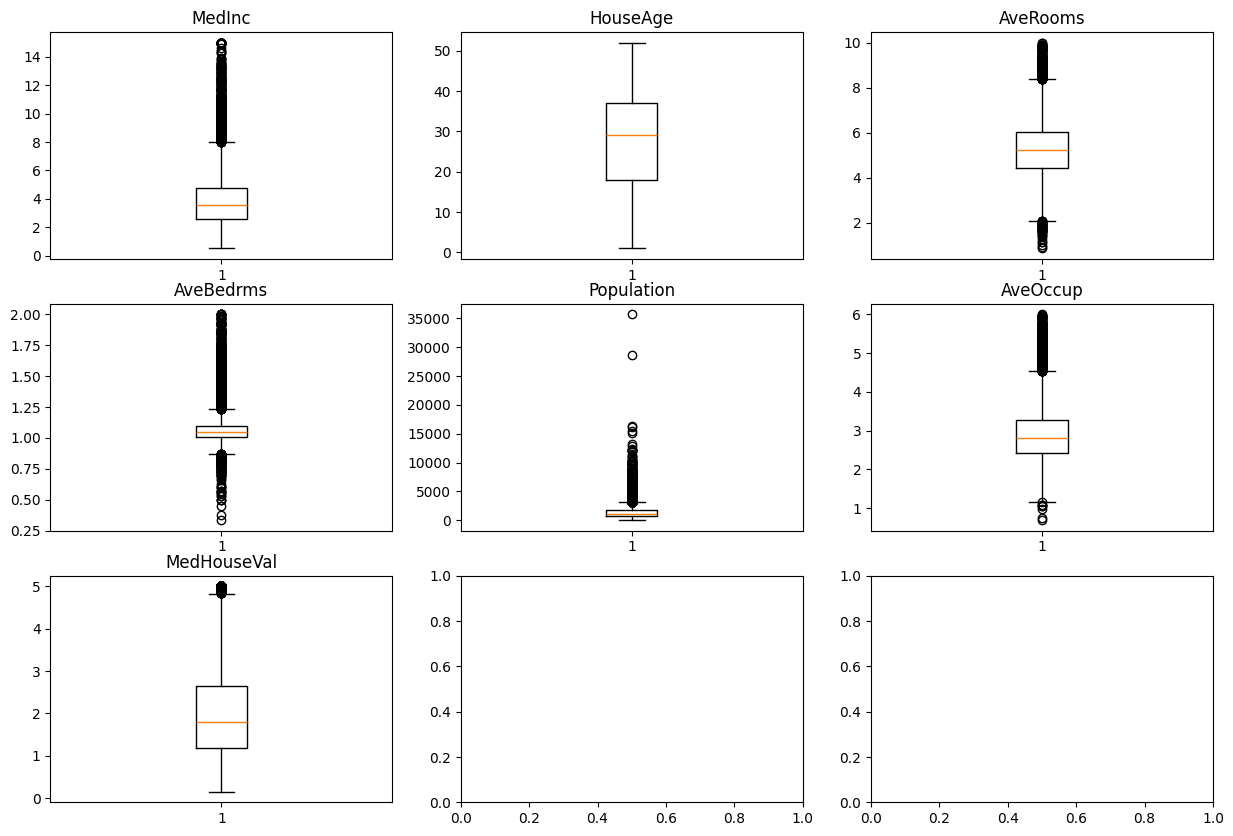

In [19]:
y = data

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10))


ax[0,0].boxplot(y.iloc[:, 0])
ax[0,0].set_title("MedInc") 
        
ax[0,1].boxplot(y.iloc[:, 1])
ax[0,1].set_title("HouseAge") 

ax[0,2].boxplot(y.iloc[:, 2])
ax[0,2].set_title("AveRooms") 

ax[1,0].boxplot(y.iloc[:, 3])
ax[1,0].set_title("AveBedrms") 

ax[1,1].boxplot(y.iloc[:, 4])
ax[1,1].set_title("Population") 

ax[1,2].boxplot(y.iloc[:, 5])
ax[1,2].set_title("AveOccup") 

ax[2,0].boxplot(y.iloc[:, 8])
ax[2,0].set_title("MedHouseVal") 

plt.show()

In [20]:
# features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population", "MedHouseVal"]
# california_housing.frame[features_of_interest]
data.drop(columns=["Latitude", "Longitude", "rich_area"]).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.277987,1.064796,1425.476744,2.903262,2.068558
std,1.899822,12.585558,1.223784,0.115058,1132.462122,0.716263,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.438304,1.005803,787.000000,2.429013,1.196000
50%,3.534800,29.000000,5.220844,1.048193,1166.000000,2.816157,1.797000
75%,4.743250,37.000000,6.014019,1.097845,1725.000000,3.273148,2.647250
max,15.000100,52.000000,10.000000,2.000000,35682.000000,6.000000,5.000010


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>],
       [<Axes: title={'center': 'rich_area'}>, <Axes: >, <Axes: >]],
      dtype=object)

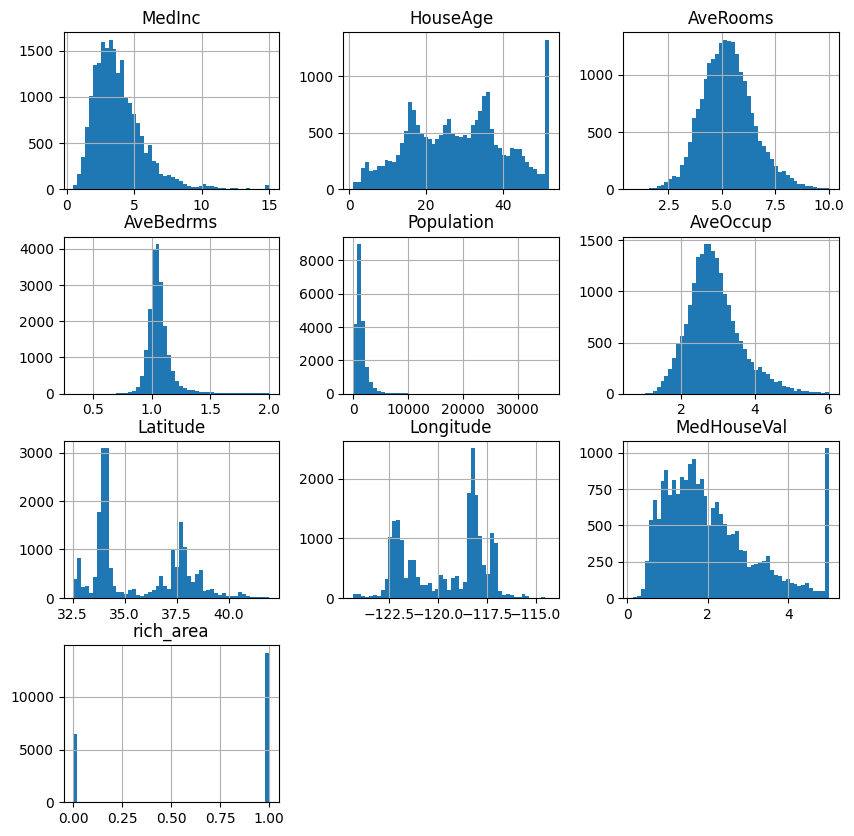

In [21]:
data.hist(bins=50, figsize=(10, 10))

In [22]:
matrix = data.corr()
matrix['MedHouseVal'].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
rich_area      0.527709
AveRooms       0.328083
HouseAge       0.105623
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.086689
Latitude      -0.144160
AveOccup      -0.276838
Name: MedHouseVal, dtype: float64

In [23]:
data = data.drop(['Population', 'Longitude'], axis=1)
data

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,MedHouseVal,rich_area
0,8.3252,41.0,6.984127,1.023810,2.555556,37.88,4.526,1
1,8.3014,21.0,6.238137,0.971880,2.109842,37.86,3.585,1
2,7.2574,52.0,8.288136,1.073446,2.802260,37.85,3.521,1
3,5.6431,52.0,5.817352,1.073059,2.547945,37.85,3.413,1
4,3.8462,52.0,6.281853,1.081081,2.181467,37.85,3.422,1
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,2.560606,39.48,0.781,0
20636,2.5568,18.0,6.114035,1.315789,3.122807,39.49,0.771,0
20637,1.7000,17.0,5.205543,1.120092,2.325635,39.43,0.923,0
20638,1.8672,18.0,5.329513,1.171920,2.123209,39.43,0.847,0


In [24]:
scaler = RobustScaler()
scaler.fit(data.drop('MedHouseVal', axis=1))
f = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'rich_area']
data_s = scaler.transform(data.drop('MedHouseVal', axis=1))
f
data_s = pd.DataFrame(data_s, columns =f, dtype = float)
data_s = data_s.drop(['AveBedrms'],axis=1)
data_s


,MedInc,HouseAge,AveRooms,AveOccup,Latitude,rich_area
0,2.197582,0.631579,1.119037,-0.308720,0.957672,0.0
1,2.186664,-0.421053,0.645608,-0.836732,0.952381,0.0
2,1.707732,1.210526,1.946604,-0.016463,0.949735,0.0
3,0.967177,1.210526,0.378563,-0.317736,0.949735,0.0
4,0.142854,1.210526,0.673351,-0.751882,0.949735,0.0
...,...,...,...,...,...,...
20635,-0.905796,-0.210526,-0.111308,-0.302737,1.380952,-1.0
20636,-0.448655,-0.578947,0.566849,0.363271,1.383598,-1.0
20637,-0.841709,-0.631579,-0.009710,-0.581094,1.367725,-1.0
20638,-0.765007,-0.578947,0.068965,-0.820897,1.367725,-1.0


In [25]:
data_x = data_s
data_y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [26]:
def metrics_table(model, X_test, y_test):
    p = model.predict(X_test)
    return pd.DataFrame({'pred':p, 'true':y_test, 'R2':r2_score(y_test, p), 'MSE':mean_squared_error(y_test, p)})

In [27]:
param_grid = {
    'n_estimators': np.random.randint(50, 200, size=10),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.random.randint(2, 10, size=10),
    'min_samples_leaf': np.random.randint(1, 4, size=10),  
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'n_jobs':[-1]

}

forest = RandomForestRegressor()

randomized_search = RandomizedSearchCV(estimator=forest, param_distributions=param_grid, n_iter=10, cv=5, scoring='mean_squared_error')

randomized_search.fit(X_train, y_train)

print("Лучшие гиперпараметры:", randomized_search.best_params_)

In [29]:
param_b = {'n_estimators': 157, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 30}

forest = RandomForestRegressor(max_features=param_b['max_features'], n_estimators=param_b['n_estimators'])
forest.fit(X_train, y_train)

# forest_best = randomized_search.best_estimator_

metrics_table(forest, X_test, y_test)

,pred,true,R2,MSE
20046,0.515554,0.47700,0.78609,0.28031
3024,0.772401,0.45800,0.78609,0.28031
15663,4.769604,5.00001,0.78609,0.28031
20484,2.736242,2.18600,0.78609,0.28031
9814,2.248854,2.78000,0.78609,0.28031
...,...,...,...,...
15362,2.490395,2.63300,0.78609,0.28031
16623,2.101261,2.66800,0.78609,0.28031
18086,4.945003,5.00001,0.78609,0.28031
2144,0.743599,0.72300,0.78609,0.28031
